# NYC Restaurant Inspections - Data Exploration

Looking at what's in the dataset and finding patterns worth exploring.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load data
df = pd.read_csv('../data/nyc_restaurant_inspections_raw.csv')
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Shape: (295831, 27)
Columns: ['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude', 'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA', 'Location']


C:\Users\hoang\AppData\Local\Temp\ipykernel_27440\2712208842.py:12: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/nyc_restaurant_inspections_raw.csv')


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location
0,50180451,MR.WONTON NY INC,Brooklyn,73,7TH AVE,11217.0,9175014562,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/19/2026,NaN,40.675182,-73.974955,306.0,39.0,15900.0,3024473.0,3.010610e+09,BK37,POINT (-73.974955288225 40.675182219331)
1,50178474,SUGARDADDY'S GENTLEMEN'S CLUB,Queens,51-07,27 STREET,11101.0,7187069600,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/19/2026,NaN,40.739673,-73.942793,402.0,26.0,100.0,4000769.0,4.001120e+09,QN31,POINT (-73.942792627254 40.739672787152)
2,50168229,ALLAN'S BAKERY,Manhattan,166,ALLEN STREET,10002.0,5169020590,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/19/2026,NaN,40.721146,-73.989368,103.0,1.0,3001.0,1005527.0,1.004160e+09,MN27,POINT (-73.989368380214 40.721145667961)
3,41482516,SHANGERILA RESTAURANT,Bronx,289395,BUHRE AVENUE,NaN,7188286080,Japanese,04/28/2022,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,21.0,NaN,NaN,01/19/2026,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN
4,50007472,SUBWAY,Manhattan,2165,FREDERICK DOUGLASS BOULEVARD,NaN,2122223748,Sandwiches,05/30/2025,Violations were cited in the following area(s).,04L,Evidence of mice or live mice in establishment...,Critical,9.0,A,05/30/2025,01/19/2026,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN


In [2]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295831 entries, 0 to 295830
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  295831 non-null  int64  
 1   DBA                    295828 non-null  object 
 2   BORO                   295831 non-null  object 
 3   BUILDING               294940 non-null  object 
 4   STREET                 295830 non-null  object 
 5   ZIPCODE                292855 non-null  float64
 6   PHONE                  295821 non-null  object 
 7   CUISINE DESCRIPTION    292559 non-null  object 
 8   INSPECTION DATE        295831 non-null  object 
 9   ACTION                 292567 non-null  object 
 10  VIOLATION CODE         290288 non-null  object 
 11  VIOLATION DESCRIPTION  290288 non-null  object 
 12  CRITICAL FLAG          295831 non-null  object 
 13  SCORE                  279538 non-null  float64
 14  GRADE                  146059 non-nu

In [3]:
# Missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

GRADE DATE               159223
GRADE                    149772
SCORE                     16293
VIOLATION DESCRIPTION      5543
VIOLATION CODE             5543
BIN                        5539
NTA                        4231
Community Board            4231
Location                   4231
Council District           4211
Census Tract               4211
CUISINE DESCRIPTION        3272
ACTION                     3264
INSPECTION TYPE            3264
ZIPCODE                    2976
Latitude                   1256
Longitude                  1256
BBL                        1256
BUILDING                    891
PHONE                        10
DBA                           3
STREET                        1
dtype: int64

In [4]:
# How many unique restaurants?
print(f"Unique restaurants (CAMIS): {df['CAMIS'].nunique()}")
print(f"Total inspection records: {len(df)}")

Unique restaurants (CAMIS): 30627
Total inspection records: 295831


In [5]:
# Convert inspection date
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'], errors='coerce')

# Filter out uninspected (1900 dates)
df_inspected = df[df['INSPECTION DATE'].dt.year > 1900].copy()

print(f"After removing uninspected restaurants: {len(df_inspected)}")
print(f"Date range: {df_inspected['INSPECTION DATE'].min()} to {df_inspected['INSPECTION DATE'].max()}")

After removing uninspected restaurants: 292567
Date range: 2007-08-06 00:00:00 to 2026-01-17 00:00:00


GRADE
A    98430
B    18595
C    13495
N     9459
Z     5169
P      911
Name: count, dtype: int64


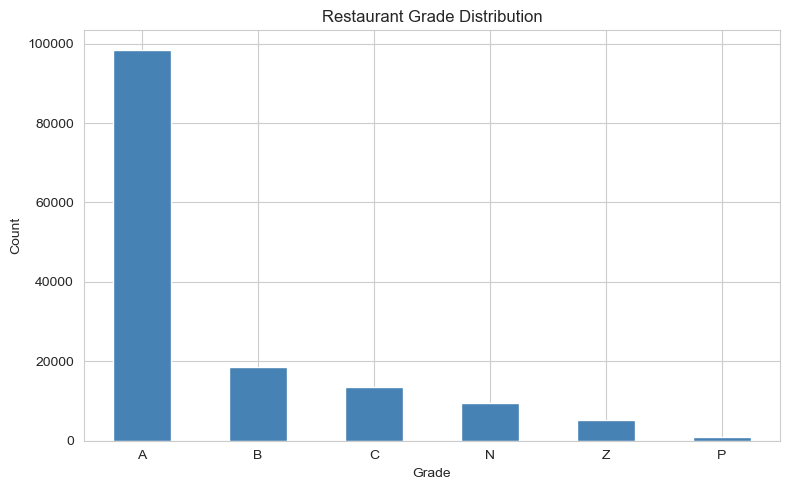

In [6]:
# Grade distribution
grade_counts = df_inspected['GRADE'].value_counts()
print(grade_counts)

plt.figure(figsize=(8, 5))
grade_counts.plot(kind='bar', color='steelblue')
plt.title('Restaurant Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
# Borough distribution
boro_counts = df_inspected['BORO'].value_counts()
print(boro_counts)

# Map numbers to names
boro_map = {
    'Manhattan': 1, 
    'Bronx': 2, 
    'Brooklyn': 3, 
    'Queens': 4, 
    'Staten Island': 5
}
# Reverse the mapping
boro_names = {v: k for k, v in boro_map.items()}

BORO
Manhattan        108011
Brooklyn          75057
Queens            72604
Bronx             26896
Staten Island      9956
0                    43
Name: count, dtype: int64


CUISINE DESCRIPTION
American                          45670
Chinese                           29157
Coffee/Tea                        20715
Pizza                             17444
Latin American                    13891
Mexican                           12208
Bakery Products/Desserts          11414
Caribbean                         11092
Japanese                          10436
Italian                            9617
Chicken                            7661
Spanish                            6666
Asian/Asian Fusion                 5639
Juice, Smoothies, Fruit Salads     5514
Sandwiches                         5154
Name: count, dtype: int64


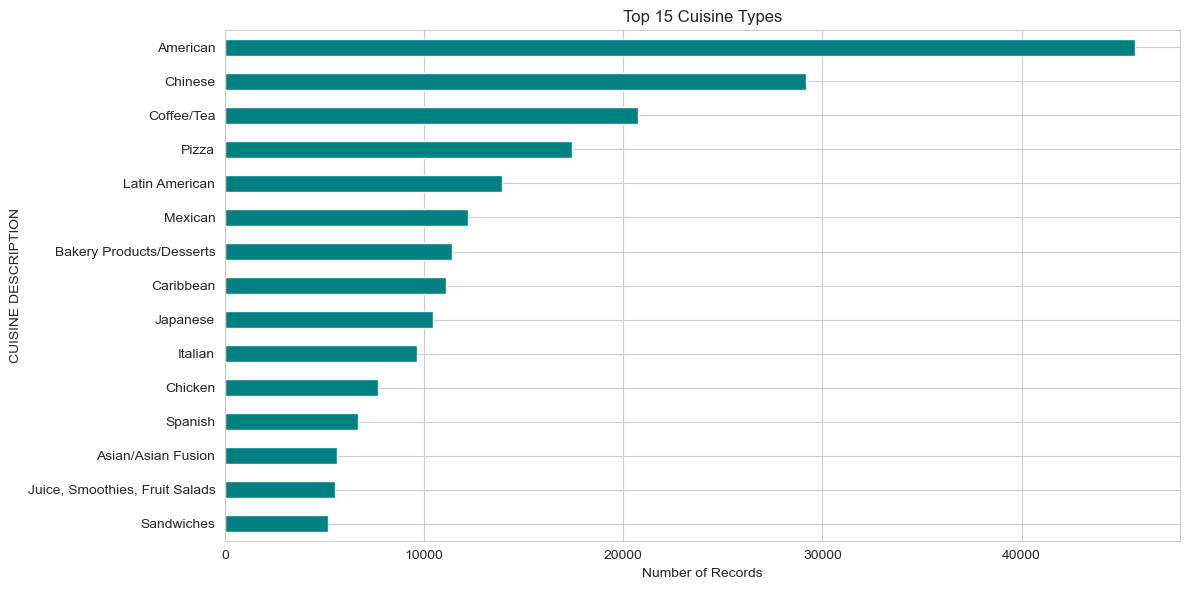

In [8]:
# Top cuisines
top_cuisines = df_inspected['CUISINE DESCRIPTION'].value_counts().head(15)
print(top_cuisines)

plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='barh', color='teal')
plt.title('Top 15 Cuisine Types')
plt.xlabel('Number of Records')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

CRITICAL FLAG
Critical          156336
Not Critical      132119
Not Applicable      4112
Name: count, dtype: int64


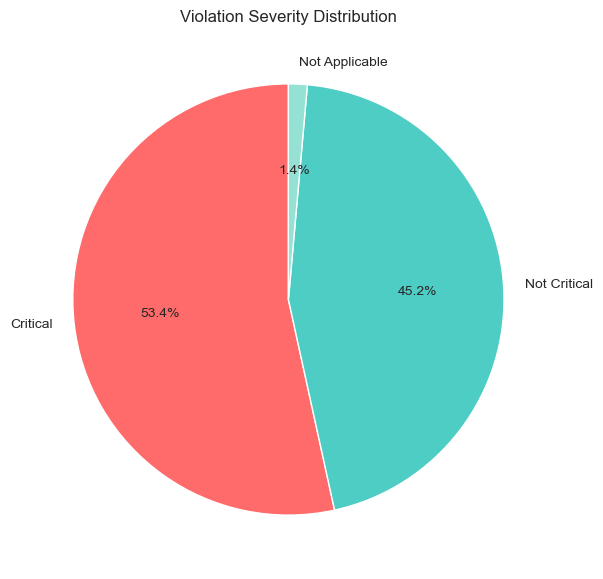

In [9]:
# Critical vs non-critical violations
critical_counts = df_inspected['CRITICAL FLAG'].value_counts()
print(critical_counts)

plt.figure(figsize=(7, 7))
critical_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                     colors=['#ff6b6b', '#4ecdc4', '#95e1d3'])
plt.title('Violation Severity Distribution')
plt.ylabel('')
plt.show()

In [10]:
# Score distribution
df_inspected['SCORE'].describe()

count    279538.000000
mean         25.164428
std          18.802390
min           0.000000
25%          12.000000
50%          21.000000
75%          33.000000
max         203.000000
Name: SCORE, dtype: float64

<Figure size 1000x600 with 0 Axes>

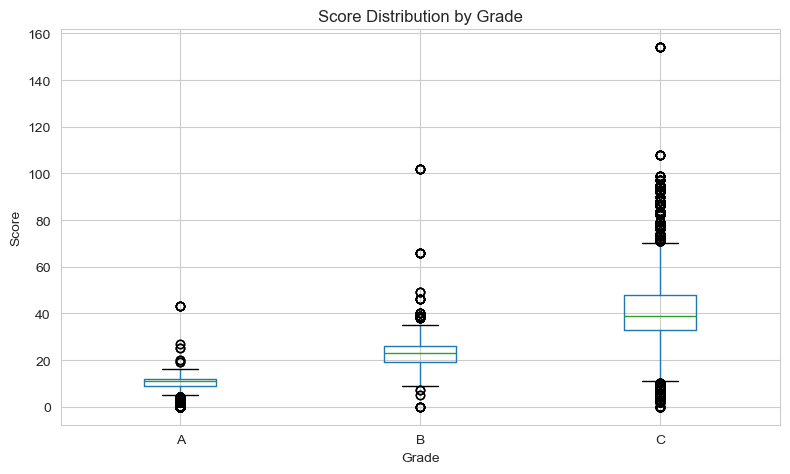

In [11]:
# Score by grade
df_graded = df_inspected[df_inspected['GRADE'].isin(['A', 'B', 'C'])].copy()

plt.figure(figsize=(10, 6))
df_graded.boxplot(column='SCORE', by='GRADE', figsize=(8, 5))
plt.suptitle('')
plt.title('Score Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

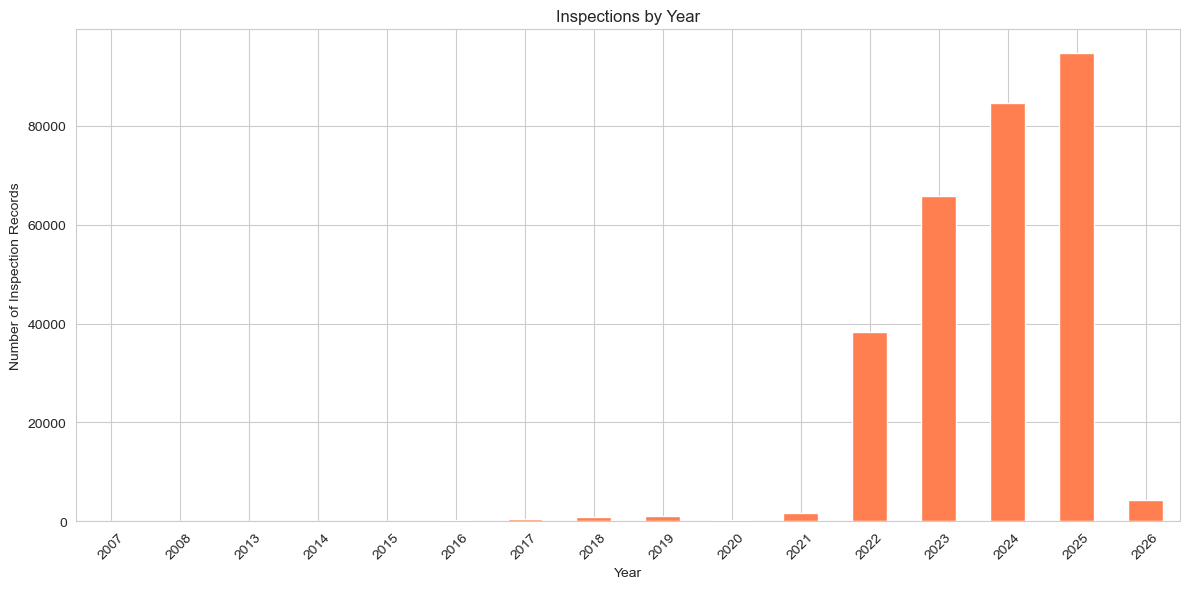

In [12]:
# Inspections over time
df_inspected['YEAR'] = df_inspected['INSPECTION DATE'].dt.year
yearly_counts = df_inspected['YEAR'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', color='coral')
plt.title('Inspections by Year')
plt.xlabel('Year')
plt.ylabel('Number of Inspection Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()